___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

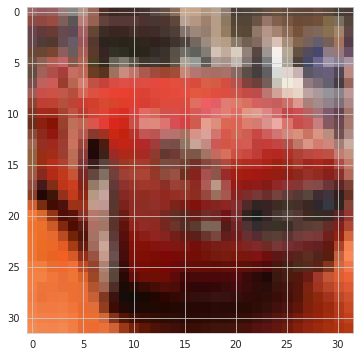

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

array([1], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
y_train[0]

array([6], dtype=uint8)

In [14]:
classes[y_train[0][0]]

'frog'

In [15]:
classes[int(y_train[0])]

'frog'

In [16]:
#int(np.random.randint(low=0, high=50000, size=1))

In [17]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

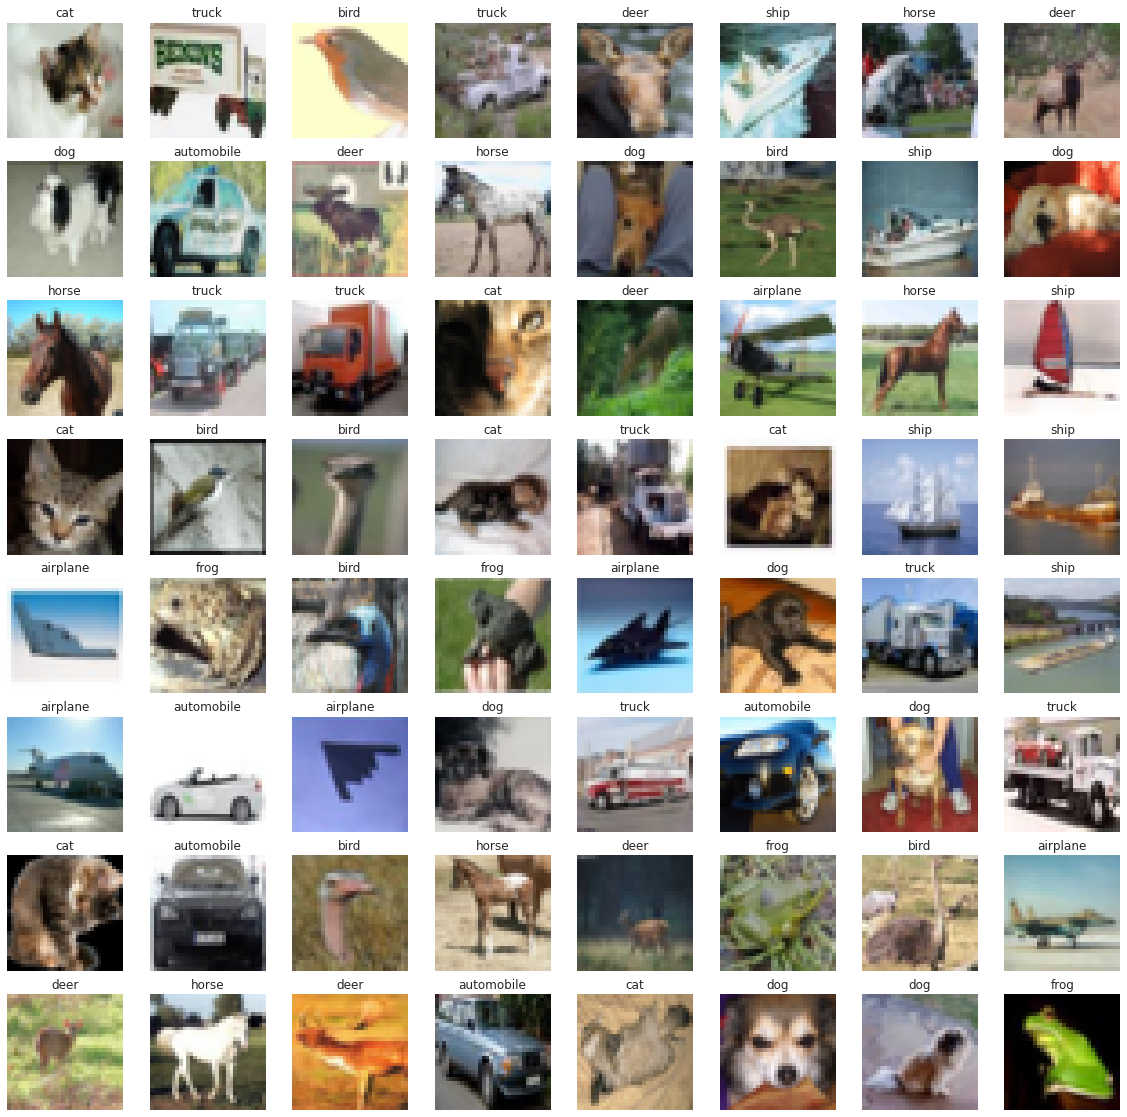

In [18]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [19]:
X_train[5].min()

0

In [20]:
X_train[5].max()

252

In [21]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
X_train[5].min()

0.0

In [23]:
X_train[5].max()

0.9882353

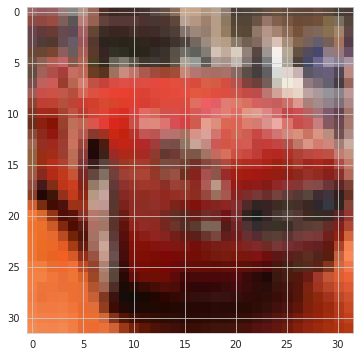

In [24]:
plt.imshow(X_train[5])

In [25]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [26]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [29]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 16s 5ms/step - loss: 1.4344 - accuracy: 0.4795 - val_loss: 1.2669 - val_accuracy: 0.5589
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0527 - accuracy: 0.6283 - val_loss: 1.0063 - val_accuracy: 0.6434
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9127 - accuracy: 0.6778 - val_loss: 0.9886 - val_accuracy: 0.6516
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8186 - accuracy: 0.7117 - val_loss: 0.9155 - val_accuracy: 0.6885
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7362 - accuracy: 0.7407 - val_loss: 0.9320 - val_accuracy: 0.6888
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6649 - accuracy: 0.7648 - val_loss: 0.9472 - val_accuracy: 0.6822


In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.434,0.480,1.267,0.559
1,1.053,0.628,1.006,0.643
2,0.913,0.678,0.989,0.652
3,0.819,0.712,0.915,0.688
4,0.736,0.741,0.932,0.689


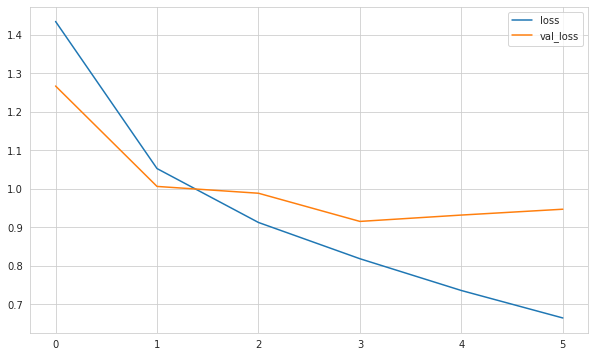

In [38]:
summary[["loss", "val_loss"]].plot();

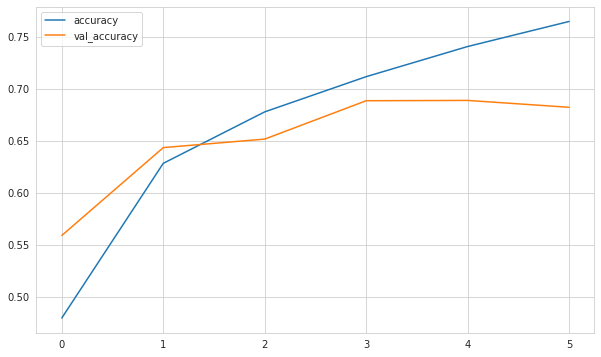

In [39]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9155 - accuracy: 0.6885


[0.915490448474884, 0.6884999871253967]

In [42]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.915490448474884
Test accuracy: 0.6884999871253967


In [43]:
pred_prob = model.predict(X_test)

In [44]:
y_pred = np.argmax(pred_prob, axis=1)

In [45]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1000
           1       0.84      0.73      0.78      1000
           2       0.60      0.55      0.57      1000
           3       0.54      0.47      0.50      1000
           4       0.62      0.65      0.64      1000
           5       0.61      0.59      0.60      1000
           6       0.66      0.85      0.74      1000
           7       0.73      0.77      0.75      1000
           8       0.81      0.80      0.80      1000
           9       0.73      0.78      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [47]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [48]:
print(confusion_matrix(y_test, y_pred))

[[707  19  80  17  25  10  21  13  72  36]
 [ 24 726   7  16   4   6  19   5  20 173]
 [ 47   4 546  55 113  68 102  39  14  12]
 [ 20   8  66 469  80 161 110  44  21  21]
 [ 15   2  66  46 654  27 101  65  22   2]
 [ 11   3  53 157  60 587  41  70  11   7]
 [  3   6  29  42  41  16 849   6   6   2]
 [ 10   1  30  37  66  55  18 772   2   9]
 [ 55  43  19  17   7  14  15   5 797  28]
 [ 42  55   9  20   4  12  18  40  22 778]]


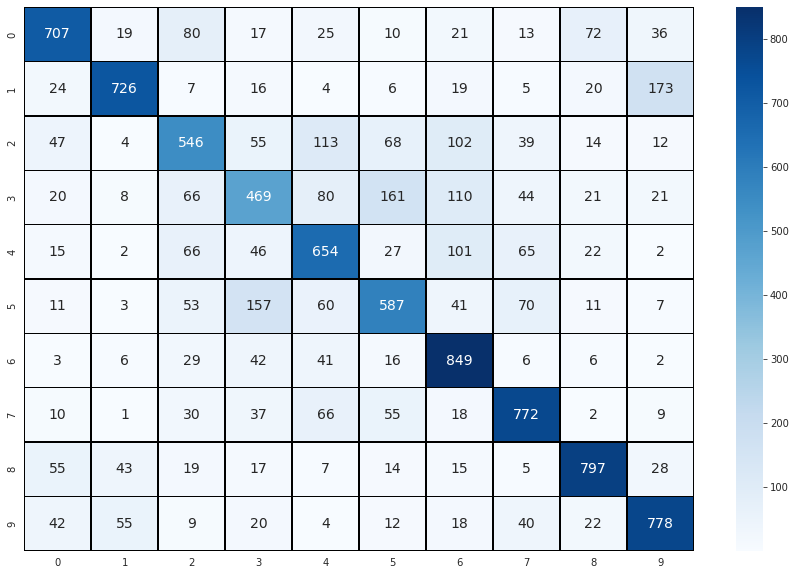

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Modelling-2

In [50]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [52]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4714 - accuracy: 0.4675 - val_loss: 1.1285 - val_accuracy: 0.5990
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0592 - accuracy: 0.6251 - val_loss: 0.9582 - val_accuracy: 0.6677
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9114 - accuracy: 0.6775 - val_loss: 0.8241 - val_accuracy: 0.7129
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8250 - accuracy: 0.7112 - val_loss: 0.8023 - val_accuracy: 0.7235
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7622 - accuracy: 0.7318 - val_loss: 0.7773 - val_accuracy: 0.7335
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7142 - accuracy: 0.7486 - val_loss: 0.7645 - val_accuracy: 0.7372
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6769 - accuracy: 0.7626 - val_loss: 0.7279 - val_accu

In [53]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.471,0.467,1.129,0.599
1,1.059,0.625,0.958,0.668
2,0.911,0.678,0.824,0.713
3,0.825,0.711,0.802,0.724
4,0.762,0.732,0.777,0.734


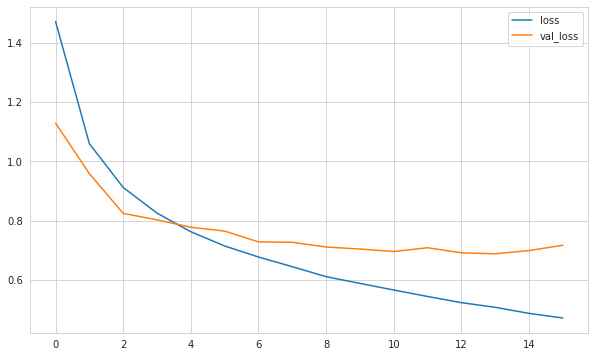

In [54]:
summary[["loss", "val_loss"]].plot();

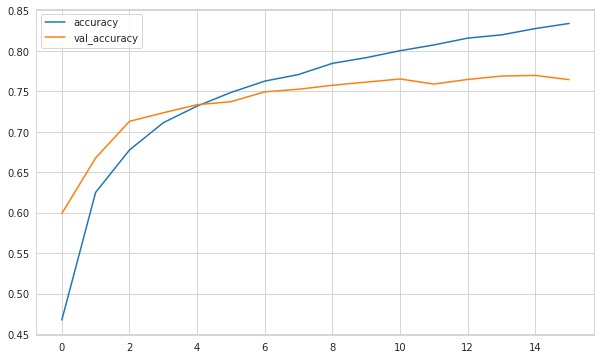

In [55]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [56]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6879 - accuracy: 0.7689


[0.6879019737243652, 0.7688999772071838]

In [57]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6879019737243652
Test accuracy: 0.7688999772071838


In [58]:
pred_prob = model.predict(X_test)

In [59]:
y_pred = np.argmax(pred_prob, axis=1)

In [60]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.90      0.85      0.88      1000
           2       0.71      0.64      0.67      1000
           3       0.58      0.59      0.59      1000
           4       0.74      0.74      0.74      1000
           5       0.75      0.60      0.66      1000
           6       0.74      0.89      0.81      1000
           7       0.83      0.83      0.83      1000
           8       0.88      0.86      0.87      1000
           9       0.79      0.89      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



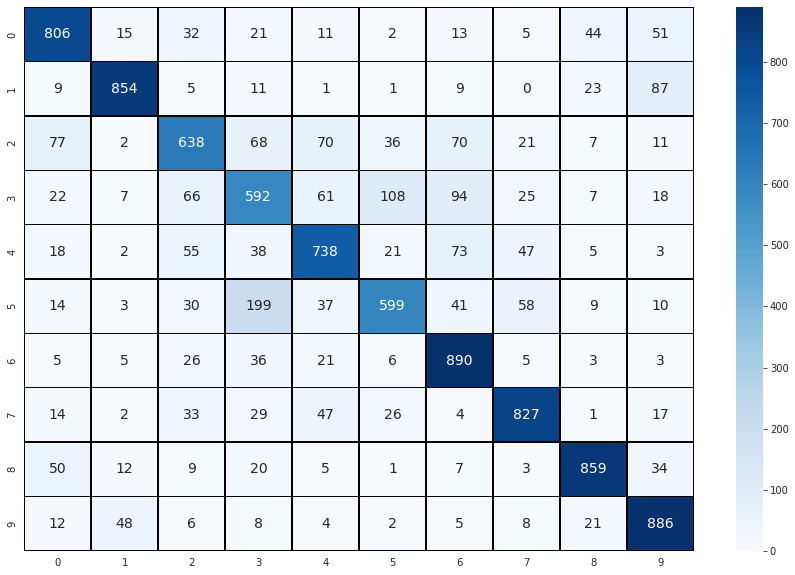

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [63]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [64]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [65]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [67]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 20s 11ms/step - loss: 1.9306 - accuracy: 0.3170 - val_loss: 1.9536 - val_accuracy: 0.3540
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4051 - accuracy: 0.4960 - val_loss: 1.1761 - val_accuracy: 0.5877
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2327 - accuracy: 0.5730 - val_loss: 1.1369 - val_accuracy: 0.6018
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1093 - accuracy: 0.6206 - val_loss: 0.8830 - val_accuracy: 0.6905
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0060 - accuracy: 0.6621 - val_loss: 0.8148 - val_accuracy: 0.7247
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9372 - accuracy: 0.6892 - val_loss: 0.7270 - val_accuracy: 0.7495
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8767 - accuracy: 0.7138 - val_loss: 0.7295 -

In [68]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.931,0.317,1.954,0.354
1,1.405,0.496,1.176,0.588
2,1.233,0.573,1.137,0.602
3,1.109,0.621,0.883,0.691
4,1.006,0.662,0.815,0.725


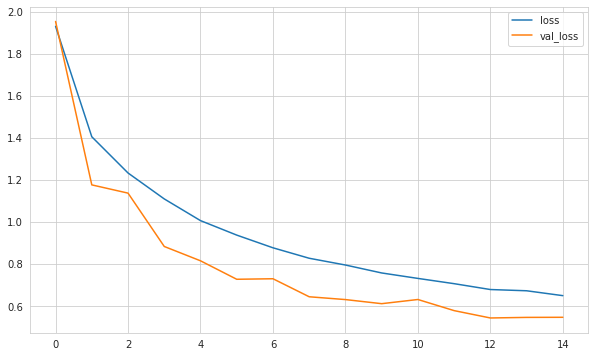

In [69]:
summary[["loss", "val_loss"]].plot();

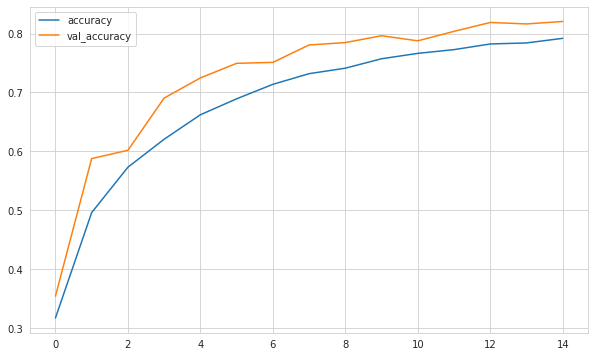

In [70]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [71]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5428 - accuracy: 0.8189


[0.5428259968757629, 0.8188999891281128]

In [72]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5428259968757629
Test accuracy: 0.8188999891281128


In [73]:
pred_prob = model.predict(X_test)

In [74]:
y_pred = np.argmax(pred_prob, axis=1)

In [75]:
y_pred

array([3, 8, 1, ..., 5, 1, 7])

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.88      0.94      0.91      1000
           2       0.80      0.71      0.75      1000
           3       0.72      0.60      0.66      1000
           4       0.77      0.83      0.80      1000
           5       0.73      0.73      0.73      1000
           6       0.78      0.91      0.84      1000
           7       0.84      0.89      0.86      1000
           8       0.92      0.87      0.89      1000
           9       0.91      0.86      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



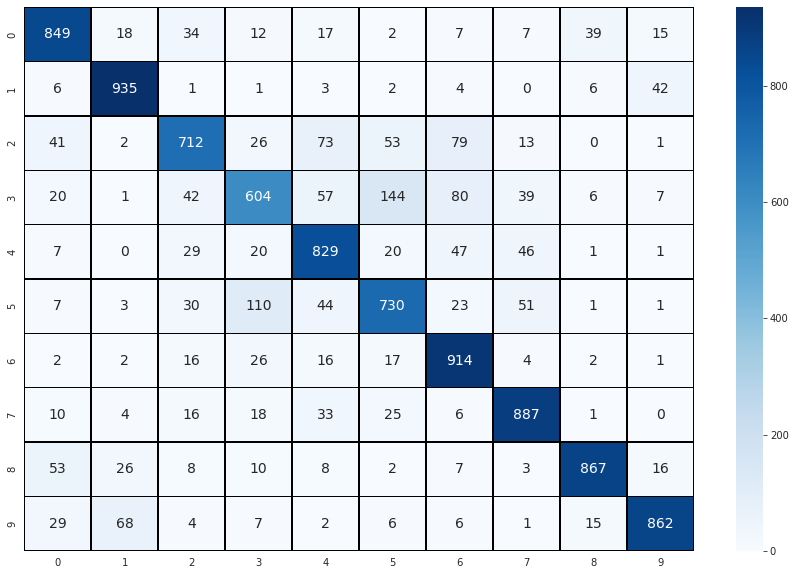

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [78]:
my_image = X_test[44]

In [79]:
my_image.shape

(32, 32, 3)

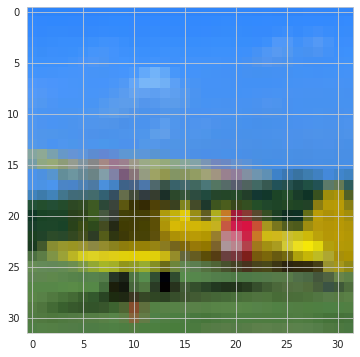

In [80]:
plt.imshow(my_image)

In [81]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [82]:
image_prediction

array([[9.9745876e-01, 1.0805205e-04, 6.3934928e-04, 5.2424955e-05,
        2.5625300e-04, 2.1080354e-05, 1.0407723e-05, 7.8367695e-05,
        7.6353410e-04, 6.1177224e-04]], dtype=float32)

In [83]:
np.argmax(image_prediction, axis=1)

array([0])

In [84]:
result=np.argmax(image_prediction, axis=1)

In [85]:
result

array([0])

In [86]:
classes[int(result)]

'airplane'

In [87]:
#model.save("cnn-1.h5")